In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Load the data models
target_model = tf.keras.models.load_model("/content/drive/MyDrive/Privacy_2nd/trained_target_model.h5")
train_data_partial=np.load("/content/drive/MyDrive/Privacy_2nd/train_data_partial.npy")
train_labels_partial=np.load("/content/drive/MyDrive/Privacy_2nd/train_labels_partial.npy")
test_data_partial=np.load("/content/drive/MyDrive/Privacy_2nd/test_data_partial.npy")
test_labels_partial=np.load("/content/drive/MyDrive/Privacy_2nd/test_labels_partial.npy")
p_train_data=np.load("/content/drive/MyDrive/Privacy_2nd/train_data_partial.npy")
p_train_labels=np.load("/content/drive/MyDrive/Privacy_2nd/train_labels_partial.npy")
p_test_data=np.load("/content/drive/MyDrive/Privacy_2nd/test_data_partial.npy")
test_member_data=np.load("/content/drive/MyDrive/Privacy_2nd/test_member_data.npy")
test_non_member_data=np.load("/content/drive/MyDrive/Privacy_2nd/test_Nonmember_data.npy")

In [ ]:
random=np.random.randint(0,10000, (10,))

In [ ]:
rndm_data=train_data_partial[random]

In [ ]:
#Summary of the given target model.
target_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928 

In [ ]:
#class labels from CIFAR 10 dataset.
class_label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
#check the data and plot them
def eval_image_data(image_data):
        num_of_rows = 3
        num_of_cols = 3
        fig, axes = plt.subplots(num_of_rows, num_of_cols, figsize=(1.5*num_of_cols,2*num_of_rows))
        for i in range(9):
            ax = axes[i//num_of_cols, i%num_of_cols]
            ax.set_axis_off()
            ax.imshow(image_data[i])

        plt.tight_layout()
        plt.show()

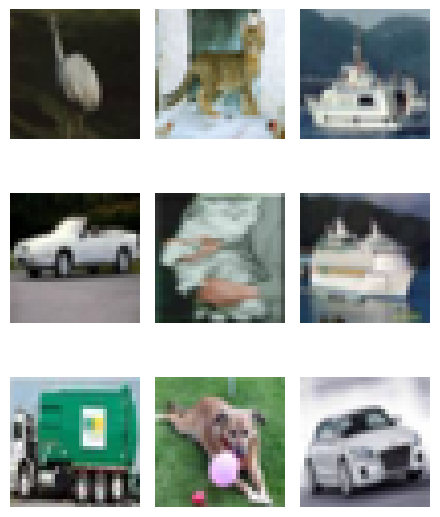

In [ ]:
eval_image_data(rndm_data)

In [ ]:
prediction=target_model(rndm_data)

In [ ]:
prediction.shape

TensorShape([10, 10])

In [ ]:
predict_label=tf.math.argmax(prediction, axis=1)
print(predict_label)

tf.Tensor([2 6 8 1 3 8 9 5 1 1], shape=(10,), dtype=int64)


In [ ]:
for i in predict_label:
    print(class_label_names[i])

bird
frog
ship
automobile
cat
ship
truck
dog
automobile
automobile


In [ ]:
first_10_labels=trainlabels_partial[random]

In [ ]:
predict_accuracy=sum(first_10_labels==predict_label.numpy())/len(first_10_labels)
print('Accuracy of Target Model :', predict_accuracy)

Accuracy of Target Model : 0.9


In [ ]:
mem_atr=target_model(train_data_partial)

mem_atr

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[ -8.09453   ,  -9.511581  ,   2.308946  , ...,   0.7989033 ,
        -11.765329  , -14.546907  ],
       [  1.4993261 ,  -1.5915823 ,   2.2405732 , ...,  -3.7230422 ,
         -5.4061685 ,   9.783438  ],
       [  1.2942592 ,   1.0332361 ,  -0.7563736 , ...,  -5.567007  ,
         -7.7828164 ,   8.665651  ],
       ...,
       [  0.69104695,   7.2425804 ,  -4.5836205 , ...,  -4.4953585 ,
          2.8515415 ,   7.202874  ],
       [ -1.0489266 ,  10.469152  ,  -2.3504214 , ...,  -3.8080924 ,
         -3.2119243 ,   3.6190464 ],
       [ -4.1086407 ,  -7.4670677 ,   3.2689018 , ...,   6.2206845 ,
        -11.102761  ,  -9.658786  ]], dtype=float32)>

In [ ]:
non_mem_atr = target_model(test_data_partial)

non_mem_atr

train_input, tst_input, train_input_labels, tst_input_labels = train_test_split(features, labels, test_size=0.33, random_state=24)

<tf.Tensor: shape=(5000, 10), dtype=float32, numpy=
array([[ -1.7871485 ,  -5.1116824 ,  -1.3135241 , ...,  -9.017349  ,
          3.2459524 ,  -4.4019    ],
       [  6.0741    ,   3.6214423 ,  -5.7152243 , ...,  -8.691189  ,
         11.031433  ,   1.1811364 ],
       [  0.8379353 ,   3.4393337 ,  -5.3589616 , ...,  -2.32182   ,
          3.0722766 ,   1.130228  ],
       ...,
       [ -3.689346  ,  -5.9777665 ,  -3.7441618 , ...,  -1.4427079 ,
         -5.288816  ,  -2.697714  ],
       [-14.829874  ,  -8.71036   ,   3.8072836 , ...,   0.63230956,
        -10.641227  , -12.714217  ],
       [  1.2543784 ,  15.432904  ,  -4.1131434 , ..., -12.167717  ,
         -8.198457  ,   5.549427  ]], dtype=float32)>

In [ ]:
Linear_reg_model = LinearRegression().fit(train_input, train_input_labels)
Linear_reg_predictive_labels = Linear_reg_model.predict(tst_input)
Linear_reg_predictive_labels = np.round(Linear_reg_predictive_labels)
print('Linear Regression Classification Report')
print(classification_report(tst_input_labels, Linear_reg_predictive_labels))

Linear Regression Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1643
           1       0.67      1.00      0.80      3307

    accuracy                           0.67      4950
   macro avg       0.33      0.50      0.40      4950
weighted avg       0.45      0.67      0.54      4950



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Linear_reg__predictive_labels = Linear_reg_model.predict(train_input)
Linear_reg_predictive_labels = np.round(Linear_reg_predictive_labels)
print('With Ground truth Data')
print(classification_report(train_input_labels, Linear_reg__predictive_labels))

With Ground truth Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3357
           1       0.67      1.00      0.80      6693

    accuracy                           0.67     10050
   macro avg       0.33      0.50      0.40     10050
weighted avg       0.44      0.67      0.53     10050



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Ada_boost_model = AdaBoostClassifier(n_estimators=100, random_state=0)
Ada_boost_model = Ada_boost_model.fit(train_input, train_input_labels)
Ada_boost_predictive_labels = Ada_boost_model.predict(tst_input)
print('AdaBoost Classification Report')
print(classification_report(tst_input_labels, Ada_boost_predictive_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Shadow model 5 : AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.40      0.02      0.03      1643
           1       0.67      0.99      0.80      3307

    accuracy                           0.67      4950
   macro avg       0.54      0.50      0.41      4950
weighted avg       0.58      0.67      0.54      4950



In [ ]:
Ada_boost_predictive_labels = Ada_boost_model.predict(train_input)
print('AdaBoost with the Ground truth Data')
print(classification_report(train_input_labels, Ada_boost_predictive_labels))

With Ground truth Data
              precision    recall  f1-score   support

           0       0.74      0.03      0.05      3357
           1       0.67      1.00      0.80      6693

    accuracy                           0.67     10050
   macro avg       0.71      0.51      0.43     10050
weighted avg       0.70      0.67      0.55     10050



In [ ]:
train_data_partial=train_data_partial[0:5000]
mem_atck_train_data = np.vstack((train_data_partial, test_data_partial))
mem_atck_train_data.shape

(10000, 32, 32, 3)

In [ ]:
mem_atck_train_lbs = np.hstack((np.ones(len(train_data_partial)), np.zeros(len(test_data_partial))))
mem_atck_train_lbs.shape

(10000,)

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report
boost = xgb.XGBClassifier( learning_rate = 0.1,
                          n_estimators = 50000,
                          max_depth = 2,
                          subsample = 0.8,
                          colsample_bytree = 1,
                          gamma = 1)
boost.fit(target_predictions, mem_atck_train_lbs)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=50000, n_jobs=None, num_parallel_tree=None,
              random_state=None, ...)

In [ ]:
def MIA(data):
  target_predictions = target_model(data)
  return boost.predict(target_predictions)

test_member_data.shape

(1000, 32, 32, 3)

In [ ]:
predict = MIA(test_member_data)
accuracy=len(predict[np.where(predict==1)])/len(predict)
accuracy

0.505

In [ ]:
test_non_member_data.shape

(1000, 32, 32, 3)

In [ ]:
predict=MIA(test_non_member_data)
accuracy=len(predict[np.where(predict==0)])/len(predict)
accuracy

0.518

In [ ]:
evaluate_data=np.load("/content/drive/MyDrive/Privacy_2nd/evaluation_data.npy")

len(evaluate_data)

10000

In [ ]:
evaluation_res=MIA(evaluate_data)
evaluation_res.shape

(10000,)

In [ ]:
np.save("/content/drive/MyDrive/Privacy_2nd/Srinivas_evaluation_result.npy", evaluation_res)

In [ ]:
import numpy as np

# Load the file
evaluation_results = np.load("/content/drive/MyDrive/Privacy_2nd/Srinivas_evaluation_result.npy")

# Print the contents
# print(evaluation_results)

print(evaluation_results[:200])

num_zeros = np.sum(evaluation_results == 0)
num_ones = np.sum(evaluation_results == 1)

print(f"Number of 0's (non-members): {num_zeros}")
print(f"Number of 1's (Members): {num_ones}")

[0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0
 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1
 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0
 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0
 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1
 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1]
Number of 0's (non-members): 5117
Number of 1's (Members): 4883
